In [234]:
# Standard libraries
import json
import itertools
import warnings
warnings.simplefilter(action='ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm, ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score # Import relevant metrics

import xgboost as xgb
from xgboost import XGBClassifier
import shap

# Domain-specific libraries (if applicable, keep separate)
import mygene

In [235]:
df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_count.csv")
df.index = df["Unnamed: 0"]
df = df.drop("Unnamed: 0", axis=1)
df

,SRR10003688,SRR10003701,SRR10003714,SRR10003789,SRR10003818,SRR10003825,SRR10003832,SRR10003838,SRR10003851,SRR10003855,...,SRR17262725,SRR17262727,SRR17262728,SRR17262730,SRR19732844,SRR19732846,SRR19732847,SRR19732849,SRR19732850,SRR19732852
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2.634591,3.861372,2.369932,-0.024265,3.037411,2.919402,2.377987,-0.024265,2.168575,-0.024265,...,3.300537,2.928413,5.002978,2.598011,4.122754,0.606221,4.269963,-0.060935,3.747578,0.854084
TNMD,0.132629,0.806335,1.547324,-0.003452,0.758335,0.843711,-0.003452,-0.003452,0.361491,-0.003452,...,3.135697,0.099653,0.099653,0.099653,1.782258,0.099653,0.966633,0.099653,1.993467,0.099653
DPM1,4.325659,4.994944,5.373903,0.040342,5.489552,5.530401,4.048836,0.040342,4.797768,0.040342,...,2.636758,3.115968,0.423205,4.539436,4.143478,3.402546,4.422577,1.910259,5.006067,2.031044
SCYL3,3.271129,2.765134,2.134989,-0.266871,3.211425,2.523350,2.546148,-0.266871,3.380146,-0.266871,...,4.244526,4.097938,3.584476,3.997066,1.708107,1.734147,2.513969,0.887502,2.021550,0.163173
FIRRM,3.272960,3.504244,4.099227,-0.116630,3.611678,3.665225,3.200871,-0.116630,3.619338,-0.116630,...,4.815363,2.289768,4.545045,1.360394,2.501322,2.670901,3.656313,0.736387,3.110104,0.285229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC124903386,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,0.013108,...,0.018899,0.018899,0.018899,0.018899,0.018899,0.539301,0.018899,0.018899,0.018899,0.018899
ZNF75CP,0.496960,0.514451,0.738695,-0.139090,0.236383,0.470304,0.114428,-0.139090,0.043105,-0.139090,...,2.927312,3.059079,3.187197,2.378335,1.893815,0.681358,1.881052,0.322162,1.291829,0.245237
ANKRD33BP3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [236]:
df_T = df.T.reset_index()
df_T = df_T.rename(columns={'index':'SRRID'})
df_T = df_T.loc[:, (df_T != 0).any(axis=0)]
df_T

Unnamed: 0,SRRID,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,LOC105372749,LOC105370117,LOC101928045,FAM106C,ZNF73P,LOC124903386,ZNF75CP,ANKRD33BP3,LOC100419917,SMIM42
0,SRR10003688,2.634591,0.132629,4.325659,3.271129,3.272960,0.376369,3.644252,3.051085,3.953366,...,0.0,0.005898,-0.012306,0.693659,0.110473,0.013108,0.496960,0.0,0.0,0.005365
1,SRR10003701,3.861372,0.806335,4.994944,2.765134,3.504244,1.589392,4.840564,3.736008,4.939723,...,0.0,0.005898,-0.012306,-0.102911,0.110473,0.013108,0.514451,0.0,0.0,0.005365
2,SRR10003714,2.369932,1.547324,5.373903,2.134989,4.099227,2.042332,6.053191,3.588188,5.227132,...,0.0,0.023598,0.058957,-0.102911,0.110473,0.013108,0.738695,0.0,0.0,0.005365
3,SRR10003789,-0.024265,-0.003452,0.040342,-0.266871,-0.116630,-0.110837,-0.579631,-0.007781,-0.470290,...,0.0,0.005898,-0.012306,-0.102911,-0.024339,0.013108,-0.139090,0.0,0.0,0.005365
4,SRR10003818,3.037411,0.758335,5.489552,3.211425,3.611678,2.185630,5.811390,3.397065,5.673002,...,0.0,0.005898,-0.012306,0.002323,0.061126,0.013108,0.236383,0.0,0.0,0.005365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,SRR19732846,0.606221,0.099653,3.402546,1.734147,2.670901,1.837354,3.426485,2.991061,4.453082,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.539301,0.681358,0.0,0.0,0.004541
1147,SRR19732847,4.269963,0.966633,4.422577,2.513969,3.656313,1.587982,5.231459,3.632744,4.738058,...,0.0,-0.007686,0.463389,0.761614,0.036639,0.018899,1.881052,0.0,0.0,0.004541
1148,SRR19732849,-0.060935,0.099653,1.910259,0.887502,0.736387,2.116241,1.042089,1.161876,3.062960,...,0.0,-0.007686,0.053203,0.350313,0.036639,0.018899,0.322162,0.0,0.0,0.004541
1149,SRR19732850,3.747578,1.993467,5.006067,2.021550,3.110104,0.391564,6.183548,3.597175,2.898243,...,0.0,-0.007686,0.053203,0.226638,0.036639,0.018899,1.291829,0.0,0.0,0.004541


In [237]:
import re

col_name = df_T.columns
result = [item for item in col_name if re.search(r'^LOC\d+', item)]
len(result)
filtered = [item for item in col_name if item not in result]
len(filtered)


41773

In [238]:
df_clen = df_T[filtered]

In [239]:
pheno_df = pd.read_csv("/Users/knu_cgl1/Desktop/Gene data/Metastsis data/Metastsis_pheno.csv")
pheno_df = pheno_df.drop("Unnamed: 0", axis=1)
pheno_df

,Cancer,ProjectID,dbgap/SRPID,Access,SRRID,GroupID,Primary Or Metastasis,Tissue
0,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003688,Breast,Primary,Breast
1,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003701,Breast,Primary,Breast
2,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003714,Breast,Primary,Breast
3,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003789,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
4,BRCA,PRJNA494906,phs001709/SRP217739,controlled access,SRR10003818,Breast,Primary,Breast (from https://portal.gdc.cancer.gov/pro...
...,...,...,...,...,...,...,...,...
1146,STAD,PRJNA850175,SRP382235,public,SRR19732846,Stomach,Primary,Stomach
1147,STAD,PRJNA850175,SRP382235,public,SRR19732847,Ovary,Metastasis,Ovary
1148,STAD,PRJNA850175,SRP382235,public,SRR19732849,Stomach,Primary,Stomach
1149,STAD,PRJNA850175,SRP382235,public,SRR19732850,Ovary,Metastasis,Ovary


In [240]:
pheno_df[["SRRID","Primary Or Metastasis"]]

,SRRID,Primary Or Metastasis
0,SRR10003688,Primary
1,SRR10003701,Primary
2,SRR10003714,Primary
3,SRR10003789,Primary
4,SRR10003818,Primary
...,...,...
1146,SRR19732846,Primary
1147,SRR19732847,Metastasis
1148,SRR19732849,Primary
1149,SRR19732850,Metastasis


In [241]:
ml_df = pd.merge(df_clen, pheno_df[["SRRID","Primary Or Metastasis"]], on="SRRID", how="left")
ml_df

,SRRID,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,LARRPM,EBF3-AS1,DAGARR,KDM5D-DT,FAM106C,ZNF73P,ZNF75CP,ANKRD33BP3,SMIM42,Primary Or Metastasis
0,SRR10003688,2.634591,0.132629,4.325659,3.271129,3.272960,0.376369,3.644252,3.051085,3.953366,...,0.122631,-0.004803,0.011569,0.0,0.693659,0.110473,0.496960,0.0,0.005365,Primary
1,SRR10003701,3.861372,0.806335,4.994944,2.765134,3.504244,1.589392,4.840564,3.736008,4.939723,...,0.122631,0.049700,0.011569,0.0,-0.102911,0.110473,0.514451,0.0,0.005365,Primary
2,SRR10003714,2.369932,1.547324,5.373903,2.134989,4.099227,2.042332,6.053191,3.588188,5.227132,...,0.122631,-0.032861,0.011569,0.0,-0.102911,0.110473,0.738695,0.0,0.005365,Primary
3,SRR10003789,-0.024265,-0.003452,0.040342,-0.266871,-0.116630,-0.110837,-0.579631,-0.007781,-0.470290,...,0.122631,-0.032861,0.011569,0.0,-0.102911,-0.024339,-0.139090,0.0,0.005365,Primary
4,SRR10003818,3.037411,0.758335,5.489552,3.211425,3.611678,2.185630,5.811390,3.397065,5.673002,...,0.122631,-0.018763,0.011569,0.0,0.002323,0.061126,0.236383,0.0,0.005365,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,SRR19732846,0.606221,0.099653,3.402546,1.734147,2.670901,1.837354,3.426485,2.991061,4.453082,...,0.242638,0.234863,-0.019740,0.0,0.226638,0.036639,0.681358,0.0,0.004541,Primary
1147,SRR19732847,4.269963,0.966633,4.422577,2.513969,3.656313,1.587982,5.231459,3.632744,4.738058,...,1.002543,0.047365,1.085272,0.0,0.761614,0.036639,1.881052,0.0,0.004541,Metastasis
1148,SRR19732849,-0.060935,0.099653,1.910259,0.887502,0.736387,2.116241,1.042089,1.161876,3.062960,...,0.207517,0.047365,0.024494,0.0,0.350313,0.036639,0.322162,0.0,0.004541,Primary
1149,SRR19732850,3.747578,1.993467,5.006067,2.021550,3.110104,0.391564,6.183548,3.597175,2.898243,...,0.803300,0.047365,0.046286,0.0,0.226638,0.036639,1.291829,0.0,0.004541,Metastasis


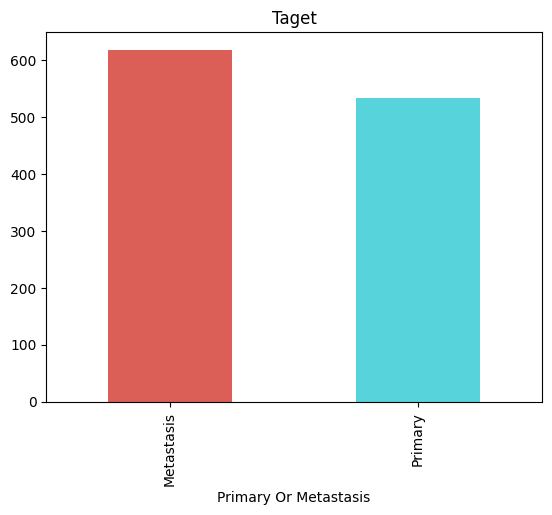

In [242]:
plt.title('Taget')
colors = sns.color_palette('hls',2)
ml_df['Primary Or Metastasis'].value_counts().plot(kind= 'bar',color=colors)
plt.show()

In [243]:
Y = ml_df['Primary Or Metastasis']
X = ml_df.drop(columns=['Primary Or Metastasis','SRRID'], axis=1)
print(Y.shape)
print(X.shape)

(1151,)
(1151, 41772)


In [244]:
from category_encoders import OrdinalEncoder, OneHotEncoder
encoder = OrdinalEncoder()
oneencoder = OneHotEncoder()
Y_ONE = oneencoder.fit_transform(Y)
Y_ONE

,Primary Or Metastasis_1,Primary Or Metastasis_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1146,1,0
1147,0,1
1148,1,0
1149,0,1


In [245]:
Y.value_counts()

Primary Or Metastasis
Metastasis    618
Primary       533
Name: count, dtype: int64

In [246]:
Y_ONE['Primary Or Metastasis_1'].value_counts()

Primary Or Metastasis_1
0    618
1    533
Name: count, dtype: int64

In [247]:
y_taget = Y_ONE['Primary Or Metastasis_1']

In [248]:
# 첫 번째 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_taget, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_taget
)

# 두 번째 split (검증셋 만들 때)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)
print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

Train data : (736, 41772) (736,)
Val data : (184, 41772) (184,)
test data : (231, 41772) (231,)


In [249]:
# 기준모델
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도 : {baseline_acc.round(3)}')
print(classification_report(y_train, baseline))

기준모델 정확도 : 0.537
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       395
           1       0.00      0.00      0.00       341

    accuracy                           0.54       736
   macro avg       0.27      0.50      0.35       736
weighted avg       0.29      0.54      0.37       736



In [250]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [251]:
pred_dt = model_dt.predict(X_val)
print(confusion_matrix(y_val, pred_dt))
print(classification_report(y_val, pred_dt))

[[66 33]
 [28 57]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        99
           1       0.63      0.67      0.65        85

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



In [252]:
#RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [253]:
pred_rf = model_rf.predict(X_val)
print(confusion_matrix(y_val, pred_rf))
print(classification_report(y_val, pred_rf))

[[84 15]
 [32 53]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        99
           1       0.78      0.62      0.69        85

    accuracy                           0.74       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184



In [254]:
# XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [255]:
pred_xgb = model_xgb.predict(X_val)
print(confusion_matrix(y_val, pred_xgb))
print(classification_report(y_val, pred_xgb))

[[85 14]
 [21 64]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.82      0.75      0.79        85

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [256]:
#LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [257]:
pred_log = model_log.predict(X_val)
print(confusion_matrix(y_val, pred_log))
print(classification_report(y_val, pred_log))

[[78 21]
 [19 66]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.76      0.78      0.77        85

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [258]:
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

In [259]:
topn = 200

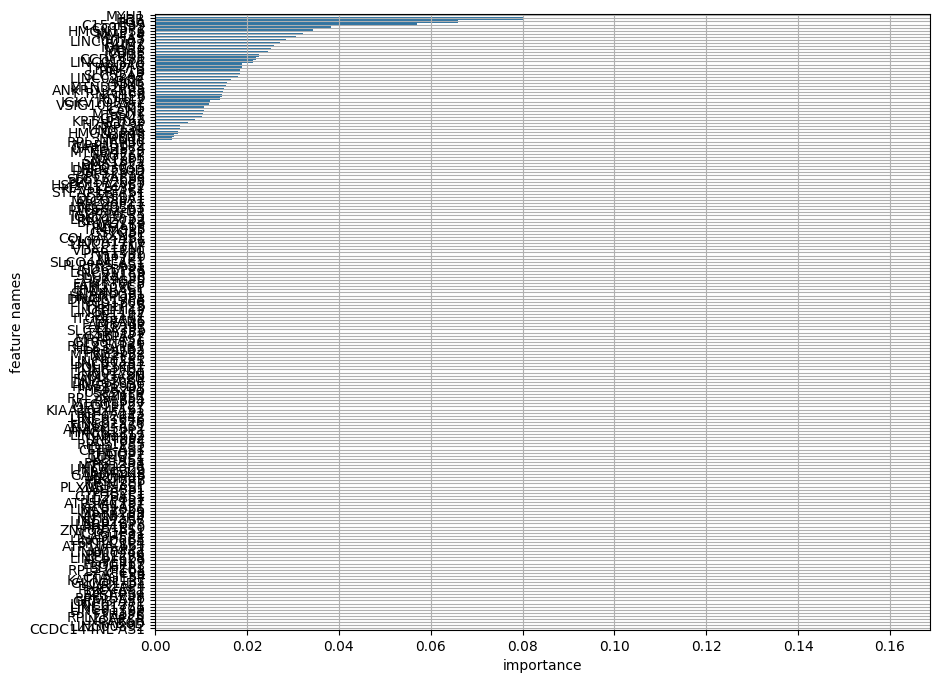

In [260]:
#DecisionTreeClassifier
result_dt = plot_feature_importance(model_dt.feature_importances_, list(X_train), topn = topn)

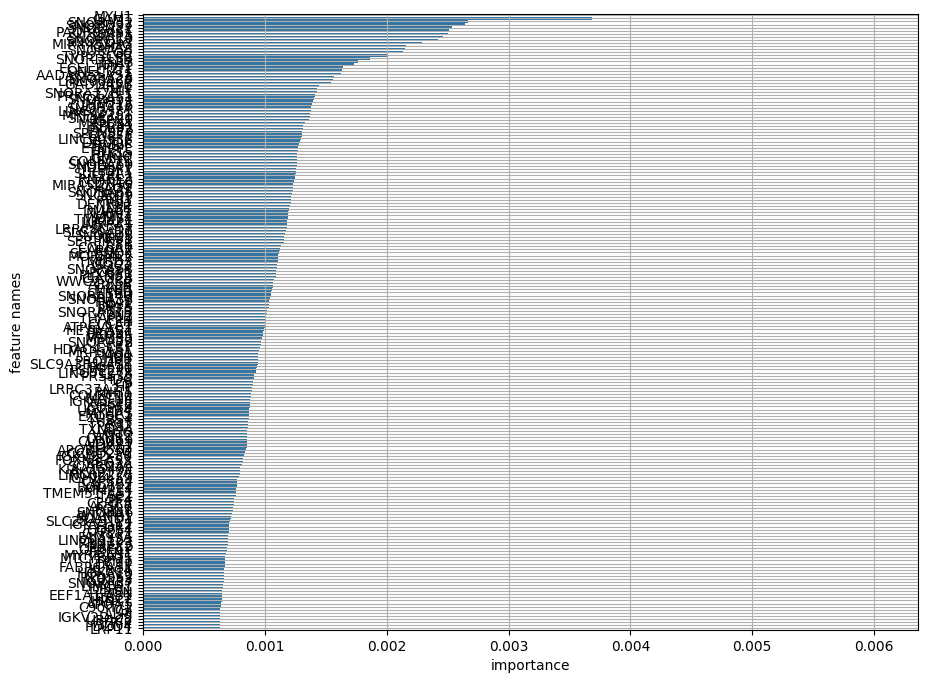

In [261]:
#RandomForestClassifier
result_rf = plot_feature_importance(model_rf.feature_importances_, list(X_train), topn = topn)

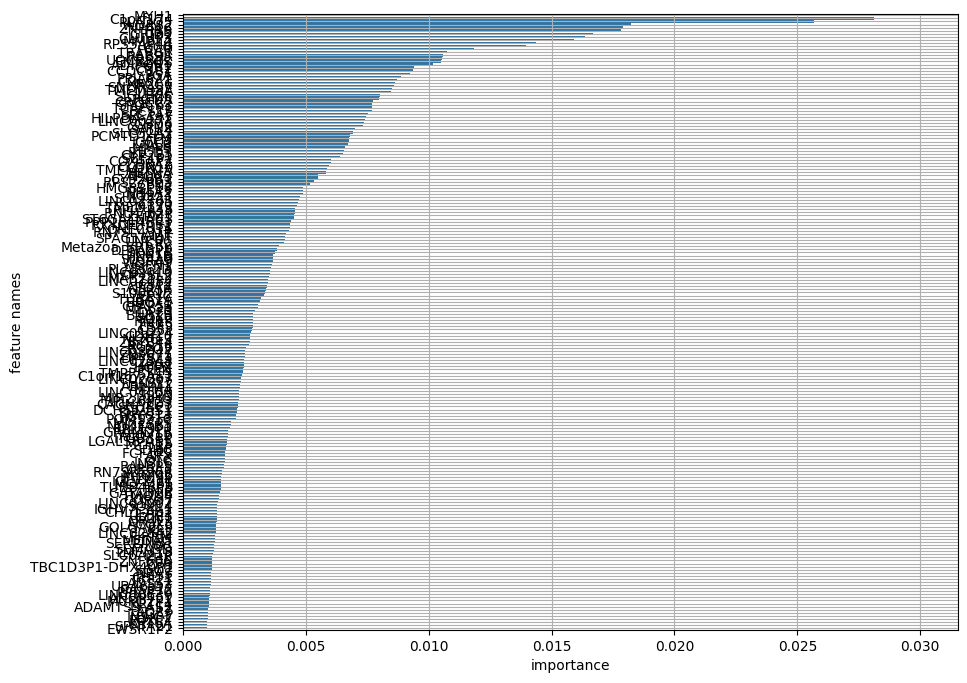

In [262]:
# XGBClassifier
result_xgb = plot_feature_importance(model_xgb.feature_importances_, list(X_train), topn = topn)

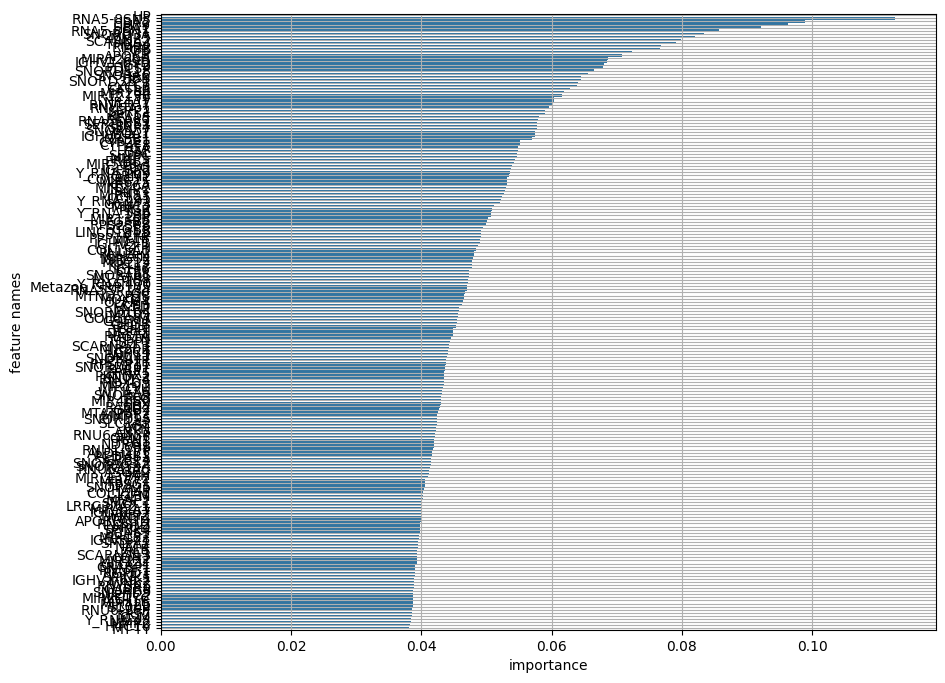

In [ ]:
#LogisticRegression
importances = np.abs(model_log.coef_[0])  # 이진분류면 [0]
feature_names = list(X_train.columns)

indices = np.argsort(importances)[::-1][:topn]

result_log = plot_feature_importance(importances, feature_names, topn = topn)

In [271]:
from collections import Counter
DT_col = list(result_dt["feature_names"])
RF_col = list(result_rf["feature_names"])
XGB_col = list(result_xgb["feature_names"])
LOG_col = list(result_log["feature_names"])

imp_col = DT_col + RF_col + XGB_col +LOG_col
Top_col = list(result_dt.iloc[0:10]["feature_names"]) + list(result_rf.iloc[0:10]["feature_names"]) + list(result_xgb.iloc[0:10]["feature_names"]) + list(result_log.iloc[0:10]["feature_names"])
counter = Counter(imp_col)

meta_all_gene_list = list(set(imp_col))
meta_gene_list = [item for item, count in counter.items() if count > 1]
meta_gene_list = list(set(meta_gene_list + Top_col))
meta_gene_list2 = [i for i in meta_gene_list if i in gene]

print(f'Metastasis gene : {len(meta_gene_list2)} / {len(meta_all_gene_list)} (gene/all)')

Metastasis gene : 60 / 747 (gene/all)


In [332]:
gene = ['LINC01553','ELF2P3','MT-TT','AIDAP1','NFKBIZ','TNF','MEDAG','SPINK1','LSR','LINC00273','NUBP2','MIR191','GAL','CAPN2','GSTM1','GC','TRBV7-3','SFRP2','FCF1P3','PTEN','MIR135B','FABP6-AS1','RSPO2','PREX2','CST2','GAMT','C9','TLE6','TSR3','PPIAP20','RPSAP59','ATRIP','RPL3L','LINC02576','AADACL2-AS1','APOBEC3D','PTH1R','MMP13','LINC02365','FOXA2','CACNA2D3','LINC02010','RNU6-16P','FAM99A','VDAC1P10','LINC01628','BDH2P1','PPIAP21','COLEC10','LNCARSR','TUBA1A','INIP','Y_RNA.470','GADD45B','ALPI','CFH','FGL1','C7','MTCYBP35','GLCCI1-DT','LMLN-AS1','IGKV2D-29','GABRP','WFDC2','PLG','MYRF','TSPAN6','CDH2','Metazoa_SRP.105','FAIM2','GAPDHP48','KEL','SNORA54','SNORA63.2','DPPA3P1','PIGR','LINC01431','S100A12','IGHV1-69-2','RGN','ANK2','PRR13P1','S100A11P6','CCT5P1','MOXD1','AGT','DPYSL3','OFD1P12Y','MRFAP1L1','SCARNA4.1','SPTLC1P4','EFNA5','OR6E1P','SNORA37','ATG4AP1','COL6A1','RNF5','SPAG16-DT','AQP7','APOB','HBA2','ST6GALNAC3','CR2','CORO7','CEBPD','MIR483','OLFM4','MT-CO1','RASD2','YWHAEP1','WDR82','KCNIP3','PPP1R1B','KIAA1143P2','VNN1','RXYLT1-AS1','TBC1D3P1-DHX40P1','IGHV7-34-1','IGLV6-57','Y_RNA.534','DGUOK','RABIF','ANGPTL1','MIR509-3','GAPDHP74','MT-TQ','IDI2-AS1','FGB','TSPY17P','CIAO2B','IGKV1OR9-2','MMP1','MIR425','SFTPC','SAR1AP4','CSF3','ADH5P2','FTH1P6','RPS27P23','GOLGA8A','KLRC4','MIR182','MRPL51P2','ADIPOR1','TF','SALL4','FTH1P25','ONECUT1','TBX5','HDC','PRSS35','SSPN','CHIT1','IGHV7-4-1','PHEX-AS1','LINC01082','TTTY20','RRN3P3','MTND2P23','LINC00385','ALAS2','CFAP53','HLA-DQB2','ADAMTS9-AS2','RNA5SP134','SFTPA2','SNORA20','MIR4453HG','FDCSP','RFLNA','LINC01819','GCG','CYP3A4','LSM5','COL15A1','MTATP8P2','PSME2P1','MORF4L2','SNORA38','FAM207CP','EXOSC1','ACSL6','SNORD104','ALDH1L1','RNA5-8SN1','OSM','TRBC2','IGHV2-5','RGMA','SCN1B','TIMM9P2','KIAA1549L','COX5AP2','ZNF416','CASP12','CHGB','LITAF','BBOX1','NIP7P1','GSTO3P','CRP','IGLV2-14','USP9YP9','RNU6ATAC','MEX3B','GOLGA6L9','DPYSL2','ARL5B','WTAPP1','LINC00707','MYOM2','SLC25A51P4','H2BC19P','SBF1P2','H19','RNU4-1','XRCC6','CD1E','LDHBP1','DUX4L50','NDUFAB1','KRTAP10-2','HAO1','PRPS1P2','CD5L','TUBB4BP8','RNU1-27P','TRIM80P','SLC52A2','SGO2','LINC01002','CP','RPL7P33','FMO1','FCGBP','HBA1','COPS9','GRB7','SOX14','RGPD1','Y_RNA.469','SLC25A6P3','MTND2P28','SMOC1','Y_RNA.109','CROCC2','FTSJ1','LINC02257','MOBP','LINC00639','UQCRBP2','FRG2FP','RPS17P7','KRT6A','GATAD2B','SPATA21','AKAP17A','LINC00442','TAGAP','TIMM9P3','LINC01717','PCDHB3','RPL23AP50','LYPD8','SLC4A9','LINC02067','CLDN10','PET117','HINT1','OPN3','AMT','MT-TY','MIR204','DEFB130D','GMNC','HP','KATNBL1P2','LINC01412','C8B','THBS4','ZNF671','PRR7','GLP1R','POLR3KP1','ISOC2','MYHAS','MRPS18A','HOXA10','KRT7','AP1B1P2','PON1','RNU4-2','MTCO1P27','SIPA1L1','ACTG1P21','IGHV4-59','WT1-AS','PHB2P1','ALOX12','IGKV1-16','C1orf167-AS1','LRP11','DPF3','LINC01162','RGS16','HBB','NKX6-3','CCL21','ITGA6-AS1','BCAS1','APOA2','FAM136BP','SERPINF2','SDCBPP3','HMGB3P18','TMEM18','COPS4','TMPRSS15','Metazoa_SRP.56','LINC02022','RPL23AP25','LINC01189','CFTR-AS1','TMEM51-AS1','NR4A2','MIR552','INSL6','MRPL34','TBX15','NDRG1','DNAJC19P8','ULBP3','ACOXL','KAT7P1','MROH4P','ITIH1','LINC00892','C4BPAP2','RHOG','BOD1L1','GPC4','EGR1','ATP5MFP3','RNA5SP99','GRID2','REG1A','MXRA5','SELENOK','KHK','HOXD9','MMP2','KIZ-AS1','SNORD15B','CTAGE3P','CCN1','IGHA2','THAP11','CDH10','CDPF1','LINC01646','LINC00363','LINC02842','IGKV2D-30','Y_RNA.48','WDR49','LARP1BP3','MCEMP1','WNT2','LINC01700','TMEM38A','RPS2P32','BUB1B','SNORD9','SLC7A15P','IGHG1','IGHV1-69D','PRODH2','HMGN2P11','SLC30A10','TRARG1','CHL1-AS2','SERPINE1','PKNOX2','RPS12P3','CPSF2','SCAND3P1','LINC01780','SFTPB','F2RL2','RDH12','LBP','MATN4','IGKV1-12','IGFBP2','MYH13','UGT2B4','CT70','LINC01022','GLCCI1','LINC02227','NRAS','APOA1','HMGN1P36','RPS23P8','LINC02348','REG3A','OR11I1P','SNORA59A','MFAP2','MFAP5','ANAPC15P2','HOPX','HPX','THNSL2','WNK2','SNORD3B-1','EDF1','OR6A2','VTN','GREB1','JCHAIN','S100P','SLCO4A1-AS1','NRN1L','CLDN19','CNR2','SLC6A21P','CCN2','FBLN1','RNU5A-1','MYH4','ALB','RPL23AP31','KIAA1614-AS1','GEM','RNY1','LINC01826','CFHR5','LINC01271','CCND2P1','RN7SL526P','COLEC11','NDUFA7','ZBTB44','HAMP','C9orf72','BRWD1P3','MIF','FCAR','MTND2P33','PAH','ABLIM1','MTND4P22','CRABP1','RNY3P1','PTCD3','FGA','NINL','NUTM2HP','TXNL4A','HSPE1P9','MUC15','ADI1','ASGR2','CRYGFP','IGHJ6','PLA2G5','TMEM123','PPP1R14BP3','ADH1B','BCS1L','ETF1P1','GTF2F1','CLCA1','EEF1A1P3','MTCO3P21','KRT14','DMAC1','FABP1','AFM','SERPINB1','MIRLET7C','ORM2','SNORA14B','APOD','TMOD4','UNC13B','LINC02381','TCF21','INSIG2','KRT17','C15orf39','IGFN1','SOX2','ARX','ATP6V1E2','SPOCK3','SNORA72','IGKV1D-35','ZFY-AS1','TMIGD3','PAQR9-AS1','CFD','ATP11A-AS1','TVP23CP2','LRRC8C-DT','FOXN3-AS2','UNC5C','CHD6','PDZD4','MT-TN','SPP1','LINC01278','PCBP1','IGF2','WWC2-AS2','TPSG1','PPP1R26P5','FGF10','LUZP4P1','PTDSS2','SFRP4','C1orf174','GPR42','LINC01224','CYP2E1','BMS1P22','GOLGA8N','OTUB1','SCUBE1','APOC3','CCDC144NL-AS1','OTC','TRIM51JP','PF4','CYP4F8','ORM1','COL4A2-AS1','LGALS8-AS1','RPS7P11','POM121C','SPINK4','OR4F3','PRDX4','MYH1','SNX18P2','NR4A1','SNORA47','CLU','SNORD3A','SLC1A2','NAT1','SLC44A3P1','NFS1','RPL12P9','RAB6D','SPDYE7P','NOP53','FGG','ZNF608','MARK2P9','LINC01399','LINC01876','PRKCZ-AS1','RALBP1','TPGS2','RPS3AP44','TMEM74','MED30','VAMP5','FAM8A4P','RPL31P35','UBAC2','CTSK','RNU1-4','MMP3','RNASE2','PLA2G2D','GRM3-AS1','ZNF687-AS1','MIRLET7F2','KANTR','TCAF1P1','LINC01755','SNORA7B','FOXL2','ZIC1','RPL21P108','C1orf216','IGLC2','RPL23AP35','TGFBI','HNF1B','COL12A1','TMEM167A','RAB9A','AADAC','MRAP-AS1','CICP4','TPM1','TONSL-AS1','MMP14','PLXNB2','SIGLEC6','TXNP1','SNORD67','FCN3','SLC1A7','MYRF-AS1','EMX2OS','HDAC4-AS1','RPS15AP6','PXMP2','CXCL8','ETNPPL','MUC2','CLUHP3','GRAMD1B','ARF1','LIMCH1','MCFD2P1','ZFPM1','ADSS2','HNRNPDP1','RNVU1-7','ERBB2','GRB14','ATP5MC1P7','CCDC181','HS6ST3','RNA5-8SN3','SNORA22','MIR210HG','IFITM9P','LINC00467','SDHC','CBS','RHOQP2','MAB21L2','MIR4527HG','COL9A1','CYP26B1','IGLV3-21','MTND3P8','GCNT3','LINC02642','CPN2','DPYS','RPL3P4','OR7L1P','SEMA3D','CCT6P4','LINC00665','SNORA65','FGFR2','EPYC','SULT2A1','LINC01656','LURAP1','RNU11','RNH1','NEFLP1','ITGB3BP','MT-ATP8','LDC1P','TAC1','STPG1','SCAND1']
len(gene)

668

In [333]:
print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

print(len(meta_gene_list2))
X_train = X_train[meta_gene_list2]
X_val = X_val[meta_gene_list2]
X_test = X_test[meta_gene_list2]

print("Train data :", X_train.shape, y_train.shape)
print("Val data :",X_val.shape, y_val.shape)
print("test data :", X_test.shape, y_test.shape)

Train data : (736, 668) (736,)
Val data : (184, 668) (184,)
test data : (231, 668) (231,)
60
Train data : (736, 60) (736,)
Val data : (184, 60) (184,)
test data : (231, 60) (231,)


In [334]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

#LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [335]:
def class_report(model, X_val, y_val):
    pred = model.predict(X_val)
    print(confusion_matrix(y_val, pred))
    print(classification_report(y_val, pred))

In [336]:
print("DecisionTreeClassifier")
class_report(model_dt, X_val, y_val)

print("RandomForestClassifier")
class_report(model_rf, X_val, y_val)

print("XGBClassifier")
class_report(model_xgb, X_val, y_val)

print("LogisticRegression")
class_report(model_log, X_val, y_val)

DecisionTreeClassifier
[[71 28]
 [24 61]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        99
           1       0.69      0.72      0.70        85

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184

RandomForestClassifier
[[82 17]
 [26 59]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.78      0.69      0.73        85

    accuracy                           0.77       184
   macro avg       0.77      0.76      0.76       184
weighted avg       0.77      0.77      0.76       184

XGBClassifier
[[78 21]
 [18 67]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.76      0.79      0.77        85

    accuracy                           0.79       184
   macro av

In [337]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [338]:
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

In [373]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # input
            nn.Linear(60, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3), 

            # hidden
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.3), 
            # h2
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            # h3
            nn.Linear(64, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.2),

            # Output
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=60, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=8, bias=True)
    (13): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.2, inplace=False)
    (16): Lin

In [368]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(1)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [369]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = y.unsqueeze(1)    # (batch, 1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred_label = (pred > 0.5).float()    # 0.5 기준으로 이진화
            correct += (pred_label == y).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [376]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

noise_std = 0.01 * X_res.std(axis=0)  # 각 feature별 표준편차의 1%
X_aug = X_res + np.random.normal(0, noise_std, X_res.shape)

In [377]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_aug.values , dtype=torch.float32)
y_train_tensor = torch.tensor(y_res.values , dtype=torch.float32)   # 이진분류면 float, 다중분류면 long
X_val_tensor = torch.tensor(X_val.values , dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values , dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values , dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values , dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [378]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.060203  [   32/  790]
loss: 0.000340  [  352/  790]
loss: 0.061802  [  672/  790]
Test Error: 
 Accuracy: 78.3%, Avg loss: 2.809345 

Epoch 2
-------------------------------
loss: 0.001743  [   32/  790]
loss: 0.003582  [  352/  790]
loss: 0.005232  [  672/  790]
Test Error: 
 Accuracy: 79.9%, Avg loss: 2.600269 

Epoch 3
-------------------------------
loss: 0.001648  [   32/  790]
loss: 0.114012  [  352/  790]
loss: 0.002092  [  672/  790]
Test Error: 
 Accuracy: 73.4%, Avg loss: 3.237761 

Epoch 4
-------------------------------
loss: 0.008684  [   32/  790]
loss: 0.001497  [  352/  790]
loss: 0.006179  [  672/  790]
Test Error: 
 Accuracy: 72.8%, Avg loss: 2.528437 

Epoch 5
-------------------------------
loss: 0.021782  [   32/  790]
loss: 0.006062  [  352/  790]
loss: 0.011690  [  672/  790]
Test Error: 
 Accuracy: 75.5%, Avg loss: 2.128912 

Epoch 6
-------------------------------
loss: 0.004691  [   32/  790]
loss: 0.001296  [  3

In [381]:
def permutation_importance_pytorch(model, X_val, y_val, metric, n_repeats=10, device='cpu'):
    model.eval()
    baseline_score = metric(y_val, (model(torch.tensor(X_val, dtype=torch.float32, device=device)).cpu().detach().numpy().flatten() > 0.5).astype(int))
    importances = []
    for i in range(X_val.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_val_perm = X_val.copy()
            np.random.shuffle(X_val_perm[:, i])  # i번째 컬럼만 셔플
            y_pred = model(torch.tensor(X_val_perm, dtype=torch.float32, device=device)).cpu().detach().numpy().flatten()
            score = metric(y_val, (y_pred > 0.5).astype(int))
            scores.append(score)
        importances.append(baseline_score - np.mean(scores))
    return np.array(importances)

# 예시 metric (이진분류 기준)
from sklearn.metrics import accuracy_score

# 사용 예시
importances = permutation_importance_pytorch(model, X_val.values, y_val.values, accuracy_score, n_repeats=10, device=device)



array([ 0.01304348,  0.025     , -0.00869565,  0.01358696,  0.00054348,
        0.03423913,  0.01467391,  0.02554348,  0.00163043,  0.03097826,
        0.0048913 ,  0.0048913 ,  0.00597826,  0.00108696,  0.01467391,
        0.00326087,  0.00652174,  0.00597826,  0.01086957,  0.00326087,
        0.0326087 ,  0.0076087 ,  0.00815217,  0.01032609,  0.0173913 ,
        0.00815217,  0.01032609,  0.04565217,  0.00054348,  0.00271739,
        0.01576087,  0.00108696,  0.01576087,  0.03913043,  0.01847826,
        0.02336957,  0.01576087,  0.0201087 ,  0.02608696,  0.01358696,
        0.00054348,  0.0125    ,  0.01576087, -0.00271739,  0.03641304,
        0.0048913 ,  0.00108696,  0.01086957,  0.00217391,  0.01413043,
        0.01141304,  0.01630435,  0.02065217,  0.01793478,  0.00869565,
        0.00923913,  0.0125    ,  0.00434783,  0.00271739,  0.00054348])